# PART 5: Regression Analysis

## Correlation & Regression

### Getting and Preparing the Data (Part 1) 

In [2]:
import pandas as pd

In [3]:
movie = pd.read_csv("movies_metadata.csv", low_memory=False)

In [9]:
movie

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [10]:
movie.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [11]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [12]:
pd.to_datetime(movie.release_date, errors = "coerce")

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
           ...    
45461          NaT
45462   2011-11-17
45463   2003-08-01
45464   1917-10-21
45465   2017-06-09
Name: release_date, Length: 45466, dtype: datetime64[ns]

In [13]:
movie = movie.set_index(pd.to_datetime(movie.release_date, errors = "coerce")).drop(columns = ["release_date"])

In [14]:
movie.sort_index(inplace=True)

In [15]:
movie

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
release_date,,,,,,,,,,,,,,,,,,,,,
1874-12-09,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,315946,tt3155794,xx,Passage de Venus,Photo sequence of the rare transit of Venus ov...,...,"[{'iso_3166_1': 'FR', 'name': 'France'}]",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Passage of Venus,False,6.0,19.0
1878-06-14,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,194079,tt2221420,en,Sallie Gardner at a Gallop,Sallie Gardner at a Gallop was one of the earl...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Sallie Gardner at a Gallop,False,6.2,25.0
1883-11-19,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,426903,tt5459794,en,Buffalo Running,Individual photographs of the running of a buf...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Buffalo Running,False,5.4,7.0
1887-08-18,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,159897,tt2075247,xx,Man Walking Around a Corner,The last remaining production of Le Prince's L...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Man Walking Around a Corner,False,4.1,17.0
1888-01-01,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,96882,tt1758563,xx,Accordion Player,The last remaining film of Le Prince's LPCCP T...,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Accordion Player,False,4.4,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,False,NaN,0,[],NaN,438910,tt0810384,ru,Konstruktor krasnogo tsveta -1993,Engineering Red - 1993 Dir: Andrey I. Y. Petr...,...,[],0.0,76.0,[],Released,NaN,Engineering Red,False,6.0,2.0
NaT,False,NaN,0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 878, ...",NaN,433711,tt3158690,en,All Superheroes Must Die 2: The Last Superhero,"In a no holds barred documentary, acclaimed jo...",...,[],0.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,All Superheroes Must Die 2: The Last Superhero,False,4.0,1.0
NaT,False,NaN,0,[],NaN,335251,tt1883368,en,The Land Where the Blues Began,An exploration of the musical and social origi...,...,[],0.0,0.0,[],Released,NaN,The Land Where the Blues Began,False,0.0,0.0


In [16]:
df = movie.loc[:, ["title", "budget", "revenue"]].copy()

In [17]:
df

,title,budget,revenue
release_date,,,
1874-12-09,Passage of Venus,0,0.0
1878-06-14,Sallie Gardner at a Gallop,0,0.0
1883-11-19,Buffalo Running,0,0.0
1887-08-18,Man Walking Around a Corner,0,0.0
1888-01-01,Accordion Player,0,0.0
...,...,...,...
NaT,Engineering Red,0,0.0
NaT,All Superheroes Must Die 2: The Last Superhero,0,0.0
NaT,The Land Where the Blues Began,0,0.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45466 entries, 1874-12-09 to NaT
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    45460 non-null  object 
 1   budget   45466 non-null  object 
 2   revenue  45460 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


In [19]:
df.budget = pd.to_numeric(df.budget, errors = "coerce")

### Getting and preparing the Data (Part 2) 

In [20]:
df

,title,budget,revenue
release_date,,,
1874-12-09,Passage of Venus,0.0,0.0
1878-06-14,Sallie Gardner at a Gallop,0.0,0.0
1883-11-19,Buffalo Running,0.0,0.0
1887-08-18,Man Walking Around a Corner,0.0,0.0
1888-01-01,Accordion Player,0.0,0.0
...,...,...,...
NaT,Engineering Red,0.0,0.0
NaT,All Superheroes Must Die 2: The Last Superhero,0.0,0.0
NaT,The Land Where the Blues Began,0.0,0.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45466 entries, 1874-12-09 to NaT
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    45460 non-null  object 
 1   budget   45463 non-null  float64
 2   revenue  45460 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.4+ MB


In [22]:
df.describe()

,budget,revenue
count,4.546300e+04,4.546000e+04
mean,4.224579e+06,1.120935e+07
std,1.742413e+07,6.433225e+07
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,3.800000e+08,2.787965e+09


In [23]:
df

,title,budget,revenue
release_date,,,
1874-12-09,Passage of Venus,0.0,0.0
1878-06-14,Sallie Gardner at a Gallop,0.0,0.0
1883-11-19,Buffalo Running,0.0,0.0
1887-08-18,Man Walking Around a Corner,0.0,0.0
1888-01-01,Accordion Player,0.0,0.0
...,...,...,...
NaT,Engineering Red,0.0,0.0
NaT,All Superheroes Must Die 2: The Last Superhero,0.0,0.0
NaT,The Land Where the Blues Began,0.0,0.0


In [24]:
df.loc[df.title.isna()]

,title,budget,revenue
release_date,,,
NaT,NaN,0.0,NaN
NaT,NaN,NaN,NaN
NaT,NaN,0.0,NaN
NaT,NaN,NaN,NaN
NaT,NaN,0.0,NaN
NaT,NaN,NaN,NaN


In [25]:
df.dropna(inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45460 entries, 1874-12-09 to NaT
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    45460 non-null  object 
 1   budget   45460 non-null  float64
 2   revenue  45460 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.4+ MB


In [27]:
df.budget.value_counts()

0.0           36570
5000000.0       286
10000000.0      259
20000000.0      243
2000000.0       242
              ...  
379000.0          1
26350000.0        1
4490331.0         1
313411.0          1
31192.0           1
Name: budget, Length: 1223, dtype: int64

In [28]:
df.revenue.value_counts()

0.0            38052
12000000.0        20
11000000.0        19
10000000.0        19
2000000.0         18
               ...  
414404.0           1
161849455.0        1
4500.0             1
566736.0           1
8888143.0          1
Name: revenue, Length: 6863, dtype: int64

In [30]:
df = df.loc[(df.budget > 0) & (df.revenue > 0)]

In [31]:
df

,title,budget,revenue
release_date,,,
1915-02-08,The Birth of a Nation,100000.0,11000000.0
1915-12-13,The Cheat,17311.0,137365.0
1916-12-24,"20,000 Leagues Under the Sea",200000.0,8000000.0
1918-08-01,Mickey,250000.0,8000000.0
1921-01-21,The Kid,250000.0,2500000.0
...,...,...,...
2017-07-26,Atomic Blonde,30000000.0,90007945.0
2017-07-28,The Emoji Movie,50000000.0,66913939.0
2017-08-03,The Dark Tower,60000000.0,71000000.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5381 entries, 1915-02-08 to 2017-08-04
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    5381 non-null   object 
 1   budget   5381 non-null   float64
 2   revenue  5381 non-null   float64
dtypes: float64(2), object(1)
memory usage: 168.2+ KB


In [34]:
df.describe()

,budget,revenue
count,5.381000e+03,5.381000e+03
mean,3.109480e+07,9.031812e+07
std,4.016263e+07,1.661423e+08
min,1.000000e+00,1.000000e+00
25%,5.037000e+06,7.011317e+06
50%,1.700000e+07,2.991874e+07
75%,4.000000e+07,9.996575e+07
max,3.800000e+08,2.787965e+09


In [35]:
df.sort_values("budget", ascending = False)

,title,budget,revenue
release_date,,,
2011-05-14,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09
2007-05-19,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08
2015-04-22,Avengers: Age of Ultron,280000000.0,1.405404e+09
2006-06-28,Superman Returns,270000000.0,3.910812e+08
2012-03-07,John Carter,260000000.0,2.841391e+08
...,...,...,...
1987-11-06,Less Than Zero,1.0,1.239638e+07
2012-03-30,Aquí Entre Nos,1.0,2.755584e+06
1936-02-05,Modern Times,1.0,8.500000e+06


In [36]:
df.sort_values("revenue", ascending = False)

,title,budget,revenue
release_date,,,
2009-12-10,Avatar,237000000.0,2.787965e+09
2015-12-15,Star Wars: The Force Awakens,245000000.0,2.068224e+09
1997-11-18,Titanic,200000000.0,1.845034e+09
2012-04-25,The Avengers,220000000.0,1.519558e+09
2015-06-09,Jurassic World,150000000.0,1.513529e+09
...,...,...,...
2003-08-15,Tere Naam,1.0,2.000000e+00
1995-09-28,Mute Witness,2.0,1.000000e+00
1996-10-16,The Wind in the Willows,12.0,1.000000e+00


In [37]:
df.to_csv("bud_vs_rev.csv")

### How to calculate Covariance and Correlation 

![Title](Covariance.jpg)

![Title](Coeffcient.jpg)

In [35]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv("bud_vs_rev.csv", parse_dates=["release_date"], index_col="release_date")

In [38]:
df

,title,budget,revenue
release_date,,,
1915-02-08,The Birth of a Nation,100000.0,11000000.0
1915-12-13,The Cheat,17311.0,137365.0
1916-12-24,"20,000 Leagues Under the Sea",200000.0,8000000.0
1918-08-01,Mickey,250000.0,8000000.0
1921-01-21,The Kid,250000.0,2500000.0
...,...,...,...
2017-07-26,Atomic Blonde,30000000.0,90007945.0
2017-07-28,The Emoji Movie,50000000.0,66913939.0
2017-08-03,The Dark Tower,60000000.0,71000000.0


In [39]:
df = df.loc["2016"]

In [40]:
df

,title,budget,revenue
release_date,,,
2016-01-01,Jane Got a Gun,25000000.0,1397284.0
2016-01-07,Friend Request,9900000.0,2400000.0
2016-01-07,The Forest,10000000.0,40055439.0
2016-01-07,Wazir,5200000.0,9200000.0
2016-01-13,13 Hours: The Secret Soldiers of Benghazi,50000000.0,69411370.0
...,...,...,...
2016-12-23,Resident Evil: The Final Chapter,40000000.0,312242626.0
2016-12-23,Railroad Tigers,50000000.0,102205175.0
2016-12-23,Dangal,10400000.0,310000000.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235 entries, 2016-01-01 to 2016-12-25
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    235 non-null    object 
 1   budget   235 non-null    float64
 2   revenue  235 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.3+ KB


In [43]:
df.describe()

,budget,revenue
count,2.350000e+02,2.350000e+02
mean,4.046169e+07,1.260742e+08
std,5.143582e+07,2.153147e+08
min,5.000000e+02,5.000000e+01
25%,8.500000e+06,5.889868e+06
50%,2.000000e+07,3.200000e+07
75%,4.550000e+07,1.422003e+08
max,2.500000e+08,1.153304e+09


In [44]:
df.mean()

budget     4.046169e+07
revenue    1.260742e+08
dtype: float64

In [45]:
df.var()

budget     2.645643e+15
revenue    4.636043e+16
dtype: float64

In [46]:
df.cov()

,budget,revenue
budget,2.645643e+15,8.861381e+15
revenue,8.861381e+15,4.636043e+16


In [47]:
df.budget.cov(df.revenue)

8861380845230341.0

In [48]:
df.corr()

,budget,revenue
budget,1.000000,0.800133
revenue,0.800133,1.000000


In [49]:
df.budget.corr(df.revenue)

0.8001327462030159

![Title](corr_eq.jpg)

In [51]:
df.budget.cov(df.revenue) / (df.budget.std() * df.revenue.std())

0.8001327462030161

<font color = purple> **Best way to get Covariance and Correlation Coefficient.**

In [52]:
np.cov(df.budget, df.revenue)

array([[2.64564313e+15, 8.86138085e+15],
       [8.86138085e+15, 4.63604298e+16]])

In [53]:
np.corrcoef(df.budget, df.revenue)

array([[1.        , 0.80013275],
       [0.80013275, 1.        ]])

### Correlation and Scatterplots – visual Interpretation

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv("bud_vs_rev.csv", parse_dates= ["release_date"], index_col="release_date")

In [58]:
df.head()

,title,budget,revenue
release_date,,,
1915-02-08,The Birth of a Nation,100000.0,11000000.0
1915-12-13,The Cheat,17311.0,137365.0
1916-12-24,"20,000 Leagues Under the Sea",200000.0,8000000.0
1918-08-01,Mickey,250000.0,8000000.0
1921-01-21,The Kid,250000.0,2500000.0


In [59]:
df = df.loc["2016"]

In [61]:
df

,title,budget,revenue
release_date,,,
2016-01-01,Jane Got a Gun,25000000.0,1397284.0
2016-01-07,Friend Request,9900000.0,2400000.0
2016-01-07,The Forest,10000000.0,40055439.0
2016-01-07,Wazir,5200000.0,9200000.0
2016-01-13,13 Hours: The Secret Soldiers of Benghazi,50000000.0,69411370.0
...,...,...,...
2016-12-23,Resident Evil: The Final Chapter,40000000.0,312242626.0
2016-12-23,Railroad Tigers,50000000.0,102205175.0
2016-12-23,Dangal,10400000.0,310000000.0


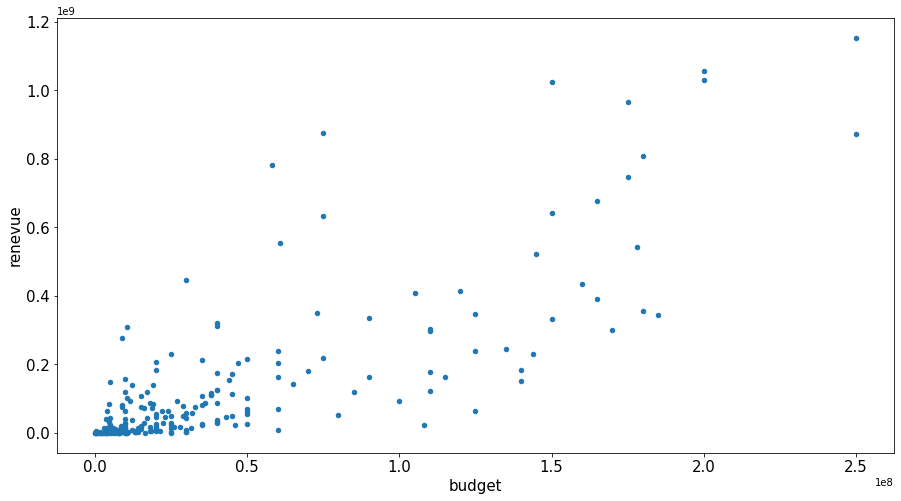

In [63]:
df.plot(kind = "scatter", figsize = (15,8), x = "budget", y = "revenue", fontsize = 15)
plt.xlabel("budget", fontsize = 15)
plt.ylabel("renevue", fontsize = 15)
plt.show()

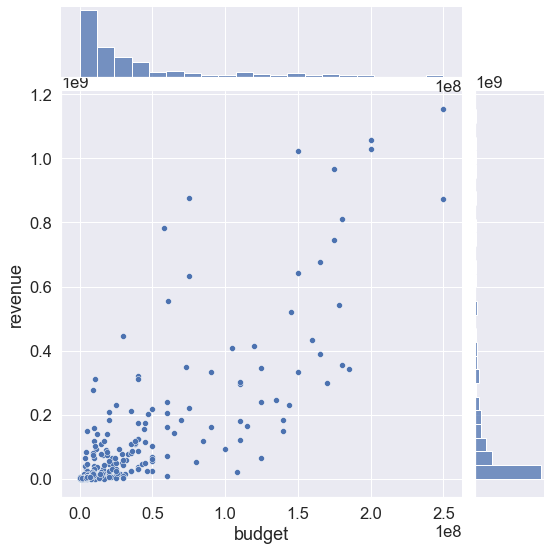

In [64]:
sns.set(font_scale = 1.5)
sns.jointplot(data = df, x = "budget", y = "revenue", height = 8)
plt.show()


### Creating a Confidence Interval for the Correlation Coefficient (Bootstrapping)

![Title](correlation.jpg)

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress = True)

In [ ]:
df = pd.read_csv("bud_vs_rev.csv", parse_dates= ["release_date"])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress= True)

In [ ]:
df = pd.read_csv("bud_vs_rev.csv", parse_dates = ["release_date"], index_col = "release_date")

In [ ]:
df = df.loc["2016"]

In [ ]:
df

In [ ]:
array = df.iloc[:, -2:].values
array

In [ ]:
array.shape

In [ ]:
np.corrcoef(array.T)[0, 1]

In [ ]:
size = array.shape[0]
size

__one bootstrap sample__

In [ ]:
np.random.seed(123)
indxs = np.random.randint(low = 0, high = size, size = size)

In [ ]:
indxs

In [ ]:
array[indxs]

In [ ]:
np.corrcoef(array[indxs].T)[0, 1]

__many bootstrap samples__

In [ ]:
sims = 100000

In [ ]:
np.random.seed(123)
indxs = np.random.randint(low = 0, high = size, size = size * sims).reshape(sims, size)

In [ ]:
indxs.shape

In [ ]:
indxs

In [ ]:
corr = []
for i in range(sims):
    corr.append(np.corrcoef(array[indxs[i]].T)[0, 1])

In [ ]:
corr

In [ ]:
plt.figure(figsize = (15, 10))
plt.hist(corr, bins = 500)
plt.show()

In [ ]:
np.min(corr)

__95% Confidence Interval Estimate__

In [ ]:
np.percentile(corr, [2.5, 97.5])

### Testing for Correlation (t-Test)

Calculate the __Correlation Coefficient__ (r) between __Movie Budgets__ and __Movie Revenues__ (for Movies released in 2016) and __test on a 5% significance level__, whether there is a linear relationship (H0: r == 0). 

In [ ]:
import pandas as pd
import scipy.stats as stats

In [ ]:
df = pd.read_csv("bud_vs_rev.csv", parse_dates = ["release_date"], index_col = "release_date")

In [ ]:
df = df.loc["2016"]

In [ ]:
df

__H0: r == 0__ <br>
__Ha: r != 0__

In [ ]:
r, p_value = stats.pearsonr(df.budget, df.revenue)

In [ ]:
r

In [ ]:
p_value

### A simple Linear Regression Model with numpy & scipy & seaborn

Create a __simple Linear Regression Model__ with the __independent variable Movie Budget__ and one __dependent variable Movie Revenue__. <br>
Visualize and interpret the __regression coefficients__.

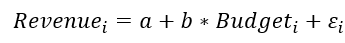

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=2, suppress= True)

In [ ]:
df = pd.read_csv("bud_vs_rev.csv", parse_dates = ["release_date"], index_col = "release_date")

In [ ]:
df = df.loc["2016"]

In [ ]:
df

In [ ]:
sns.set(font_scale=1.5)
sns.lmplot(data = df, x = "budget", y = "revenue", height = 8, ci = None)
plt.show()

__Linear Regression with numpy__

In [ ]:
x = df.iloc[:, -2].values
x

In [ ]:
y = df.iloc[:, -1].values
y

In [ ]:
reg = np.polyfit(x = x, y = y, deg = 1)
reg

In [ ]:
np.polyfit(x = df.budget, y = df.revenue, deg = 1)

In [ ]:
X = np.array([min(x), max(x)]) #creating x and y values for regression line

In [ ]:
X

In [ ]:
Y = np.polyval(reg, X)

In [ ]:
Y

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(X, Y)
plt.scatter(x = x, y = y)
plt.xlabel("Budget (in MUSD)")
plt.ylabel("Revenue (in MUSD)")
plt.show()

__Linear Regression with scipy__

In [ ]:
df

In [ ]:
stats.linregress(x = df.budget, y = df.revenue)

### How to interpret Regression Coefficients (Intercept and Slope)

In [ ]:
stats.linregress(x = df.budget, y = df.revenue)

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(X, Y)
plt.grid()
plt.scatter(x = x, y = y)
plt.xlabel("Budget (in MUSD)", fontsize = 15)
plt.ylabel("Revenue (in MUSD)", fontsize = 15)
plt.title("Linear Regression Model Revenue vs. Budget", fontsize = 15)
plt.show()

In [ ]:
df.budget.cov(df.revenue) / df.budget.var()

## Case Study (Part 1): The Market Model (Single Factor Model)

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df = yf.download(["MSFT", "^SP500TR"], start = "2015-12-31", end = "2018-12-31")

In [ ]:
df

In [ ]:
df = df["Adj Close"]

In [ ]:
df

In [ ]:
ret = df.pct_change().dropna()

In [ ]:
ret

In [ ]:
ret.plot(x = "^SP500TR", y = "MSFT", figsize = (12, 8), kind = "scatter")
plt.grid()
plt.title("MSFT vs. SP500 (daily returns)", fontsize = 15)
plt.show()

In [ ]:
r, p_value = stats.pearsonr(ret["^SP500TR"], ret.MSFT)

In [ ]:
r

In [ ]:
p_value

## Case Study (Part 2): The Market Model (Single Factor Model)

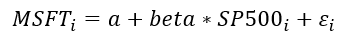

In [ ]:
beta, intercept, rvalue, pvalue, stderr = stats.linregress(x = ret["^SP500TR"], y = ret.MSFT)

In [ ]:
beta

In [ ]:
intercept

In [ ]:
rvalue

In [ ]:
sns.set(font_scale=1.5)
sns.lmplot(data = ret, x = "^SP500TR", y = "MSFT", height = 8, ci = None)
plt.show()